# HCPC with MCA

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_tea
tea = load_tea()
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   breakfast         300 non-null    category
 1   tea.time          300 non-null    category
 2   evening           300 non-null    category
 3   lunch             300 non-null    category
 4   dinner            300 non-null    category
 5   always            300 non-null    category
 6   home              300 non-null    category
 7   work              300 non-null    category
 8   tearoom           300 non-null    category
 9   friends           300 non-null    category
 10  resto             300 non-null    category
 11  pub               300 non-null    category
 12  Tea               300 non-null    category
 13  How               300 non-null    category
 14  sugar             300 non-null    category
 15  how               300 non-null    category
 16  where             300 non-

## MCA on tea

In [3]:
# MCA
from scientisttools import MCA
res_mca = MCA(n_components=20,quanti_sup=18, quali_sup=list(range(19,36)))
res_mca.fit(tea)

MCA(n_components=20,
    quali_sup=[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
               35],
    quanti_sup=18)

## HCPC

In [4]:
from scientisttools import HCPC
res_hcpc = HCPC(res_mca,n_clusters=3)

## Description des classes

In [5]:
desc_var = res_hcpc.desc_var_
desc_var.keys()

dict_keys(['quanti_var', 'quanti', 'test_chi2', 'category', 'call'])

### Description par les variables/modalités

#### Chi2

In [6]:
desc_var["test_chi2"]

,statistic,dof,pvalue
where,233.510395,4,2.316552e-49
how,167.502803,4,3.592323e-35
price,171.859417,10,1.142914e-31
How,54.486737,6,5.884403e-10
tearoom,41.395914,2,1.025632e-09
dinner,38.737539,2,3.874810e-09
friends,26.390863,2,1.859075e-06
Tea,26.511626,4,2.494971e-05
sex,16.282505,2,2.912722e-04
work,15.604561,2,4.088017e-04


#### Category

In [7]:
category = desc_var["category"]

##### Cluster 1

In [8]:
# cluster 1
category["1"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
where=chain store,81.770833,92.899408,64.000000,0.000000e+00,11.824724
how=tea bag,80.000000,80.473373,56.666667,0.000000e+00,9.435561
tearoom=Not.tearoom,64.462810,92.307692,80.666667,7.063514e-09,5.789408
price=p_branded,78.947368,44.378698,31.666667,8.000670e-08,5.367114
dinner=Not.dinner,59.498208,98.224852,93.000000,5.774071e-05,4.021859
price=p_private label,95.238095,11.834320,7.000000,1.982437e-04,3.721244
How=alone,63.076923,72.781065,65.000000,1.355355e-03,3.203994
price=p_unknown,100.000000,7.100592,4.000000,1.886261e-03,3.107580
always=Not.always,62.436548,72.781065,65.666667,3.253278e-03,2.942734
friends=Not.friends,67.307692,41.420118,34.666667,5.318934e-03,2.787056


In [9]:
# cluster 2
category["2"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
price=p_upscale,73.584906,66.101695,17.666667,0.000000e+00,10.865444
where=tea shop,90.000000,45.762712,10.000000,0.000000e+00,10.199110
how=unpackaged,77.777778,47.457627,12.000000,0.000000e+00,9.335354
dinner=dinner,71.428571,25.423729,7.000000,6.496428e-10,6.177889
Tea=black,35.135135,44.067797,24.666667,1.178166e-04,3.850625
sex=M,29.508197,61.016949,40.666667,3.933600e-04,3.544499
lunch=Not.lunch,21.875000,94.915254,85.333333,2.048788e-02,2.317291
resto=Not.resto,22.624434,84.745763,73.666667,3.138693e-02,2.152132
friends=Not.friends,25.961538,45.762712,34.666667,4.606546e-02,1.994793
SPC=student,11.428571,13.559322,23.333333,4.802745e-02,-1.977125


In [10]:
# cluster 3
category["3"]

,Class/Mod,Mod/Class,Global,pvalue,vtest
where=chain store+tea shop,67.948718,73.611111,26.000000,0.000000e+00,10.547273
how=tea bag+unpackaged,55.319149,72.222222,31.333333,0.000000e+00,8.565712
tearoom=tearoom,53.448276,43.055556,19.333333,5.315051e-09,5.836996
price=p_variable,41.964286,65.277778,37.333333,1.978381e-08,5.613881
How=other,100.000000,12.500000,3.000000,6.252568e-08,5.411424
friends=friends,33.163265,90.277778,65.333333,3.521991e-07,5.093131
How=lemon,54.545455,25.000000,11.000000,1.375002e-05,4.347816
work=work,39.080460,47.222222,29.000000,9.532921e-05,3.902183
always=always,36.893204,52.777778,34.333333,1.602725e-04,3.774588
resto=resto,37.974684,41.666667,26.333333,7.173815e-04,3.382849


### Description par les axes factoriels

In [11]:
desc_axes = res_hcpc.desc_axes_
desc_axes.keys()

dict_keys(['quanti_var', 'quanti', 'call'])

##### 

In [12]:
desc_axes["quanti_var"]

,R2,pvalue
Dim.2,0.576366,4.056518e-56
Dim.1,0.417071,1.563006e-35
Dim.6,0.079836,4.305054e-06
Dim.4,0.073450,1.202401e-05
Dim.16,0.060925,8.830005e-05
Dim.7,0.023560,2.899870e-02
Dim.11,0.021625,3.891085e-02


In [13]:
desc_axes_quanti = desc_axes["quanti"]

In [14]:
# Cluster 1
desc_axes_quanti["1"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.6,3.943368,0.053643,-6.722053e-18,0.274038,0.267171,0.000080
Dim.4,3.261370,0.046393,-2.255141e-17,0.191576,0.279382,0.001109
Dim.7,-2.403239,-0.031868,1.301043e-18,0.279202,0.260440,0.016251
Dim.1,-9.060303,-0.177637,-4.119968e-17,0.268010,0.385064,0.000000
Dim.2,-9.156705,-0.162543,1.431147e-17,0.164087,0.348636,0.000000


In [15]:
# Cluster 2
desc_axes_quanti["2"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.2,12.926755,0.526754,1.431147e-17,0.374655,0.348636,0.000000
Dim.11,-2.045793,-0.057127,5.204170e-18,0.194960,0.238909,0.040777
Dim.16,-4.090808,-0.103553,-3.079134e-17,0.248349,0.216575,0.000043


In [16]:
# Cluster 3
desc_axes_quanti["3"]

,vtest,Mean in category,Overall mean,sd in categorie,Overall sd,pvalue
Dim.1,10.808283,0.428307,-4.119968e-17,0.319046,0.385064,0.000000
Dim.7,2.401053,0.064354,1.301043e-18,0.240221,0.260440,0.016348
Dim.16,2.306803,0.051414,-3.079134e-17,0.213845,0.216575,0.021066
Dim.11,2.019404,0.049650,5.204170e-18,0.199354,0.238909,0.043445
Dim.13,-2.411393,-0.056551,5.421011e-17,0.224908,0.227881,0.015892
Dim.4,-4.672249,-0.134335,-2.255141e-17,0.287709,0.279382,0.000003
Dim.6,-4.737531,-0.130259,-6.722053e-18,0.211240,0.267171,0.000002


## Description par les individus

In [17]:
desc_ind = res_hcpc.desc_ind_
desc_ind.keys()

dict_keys(['para', 'dist'])

In [18]:
para = desc_ind["para"]

In [19]:
# Cluster 1
para["Cluster : 1"]

284    0.367526
142    0.368603
6      0.405655
70     0.427151
174    0.429889
Name: distance, dtype: float64

In [20]:
# Cluster 2
para["Cluster : 2"]

15     0.591696
205    0.683554
112    0.696483
30     0.714392
181    0.847213
Name: distance, dtype: float64

In [21]:
# Cluster 3
para["Cluster : 3"]

32     0.498424
171    0.566898
232    0.590260
234    0.631234
111    0.639122
Name: distance, dtype: float64

In [22]:
dist = desc_ind["dist"]

In [23]:
# Cluster 1
dist["Cluster : 1"]

81     3.528455
288    3.291564
291    3.109027
93     3.100804
152    3.098836
Name: distance, dtype: float64

In [24]:
# Cluster 1
dist["Cluster : 2"]

211    1.944059
5      1.940972
189    1.798970
2      1.718078
204    1.699879
Name: distance, dtype: float64

In [25]:
# Cluster 1
dist["Cluster : 3"]

65     3.324101
203    3.192423
147    2.633885
134    2.418577
21     2.374845
Name: distance, dtype: float64

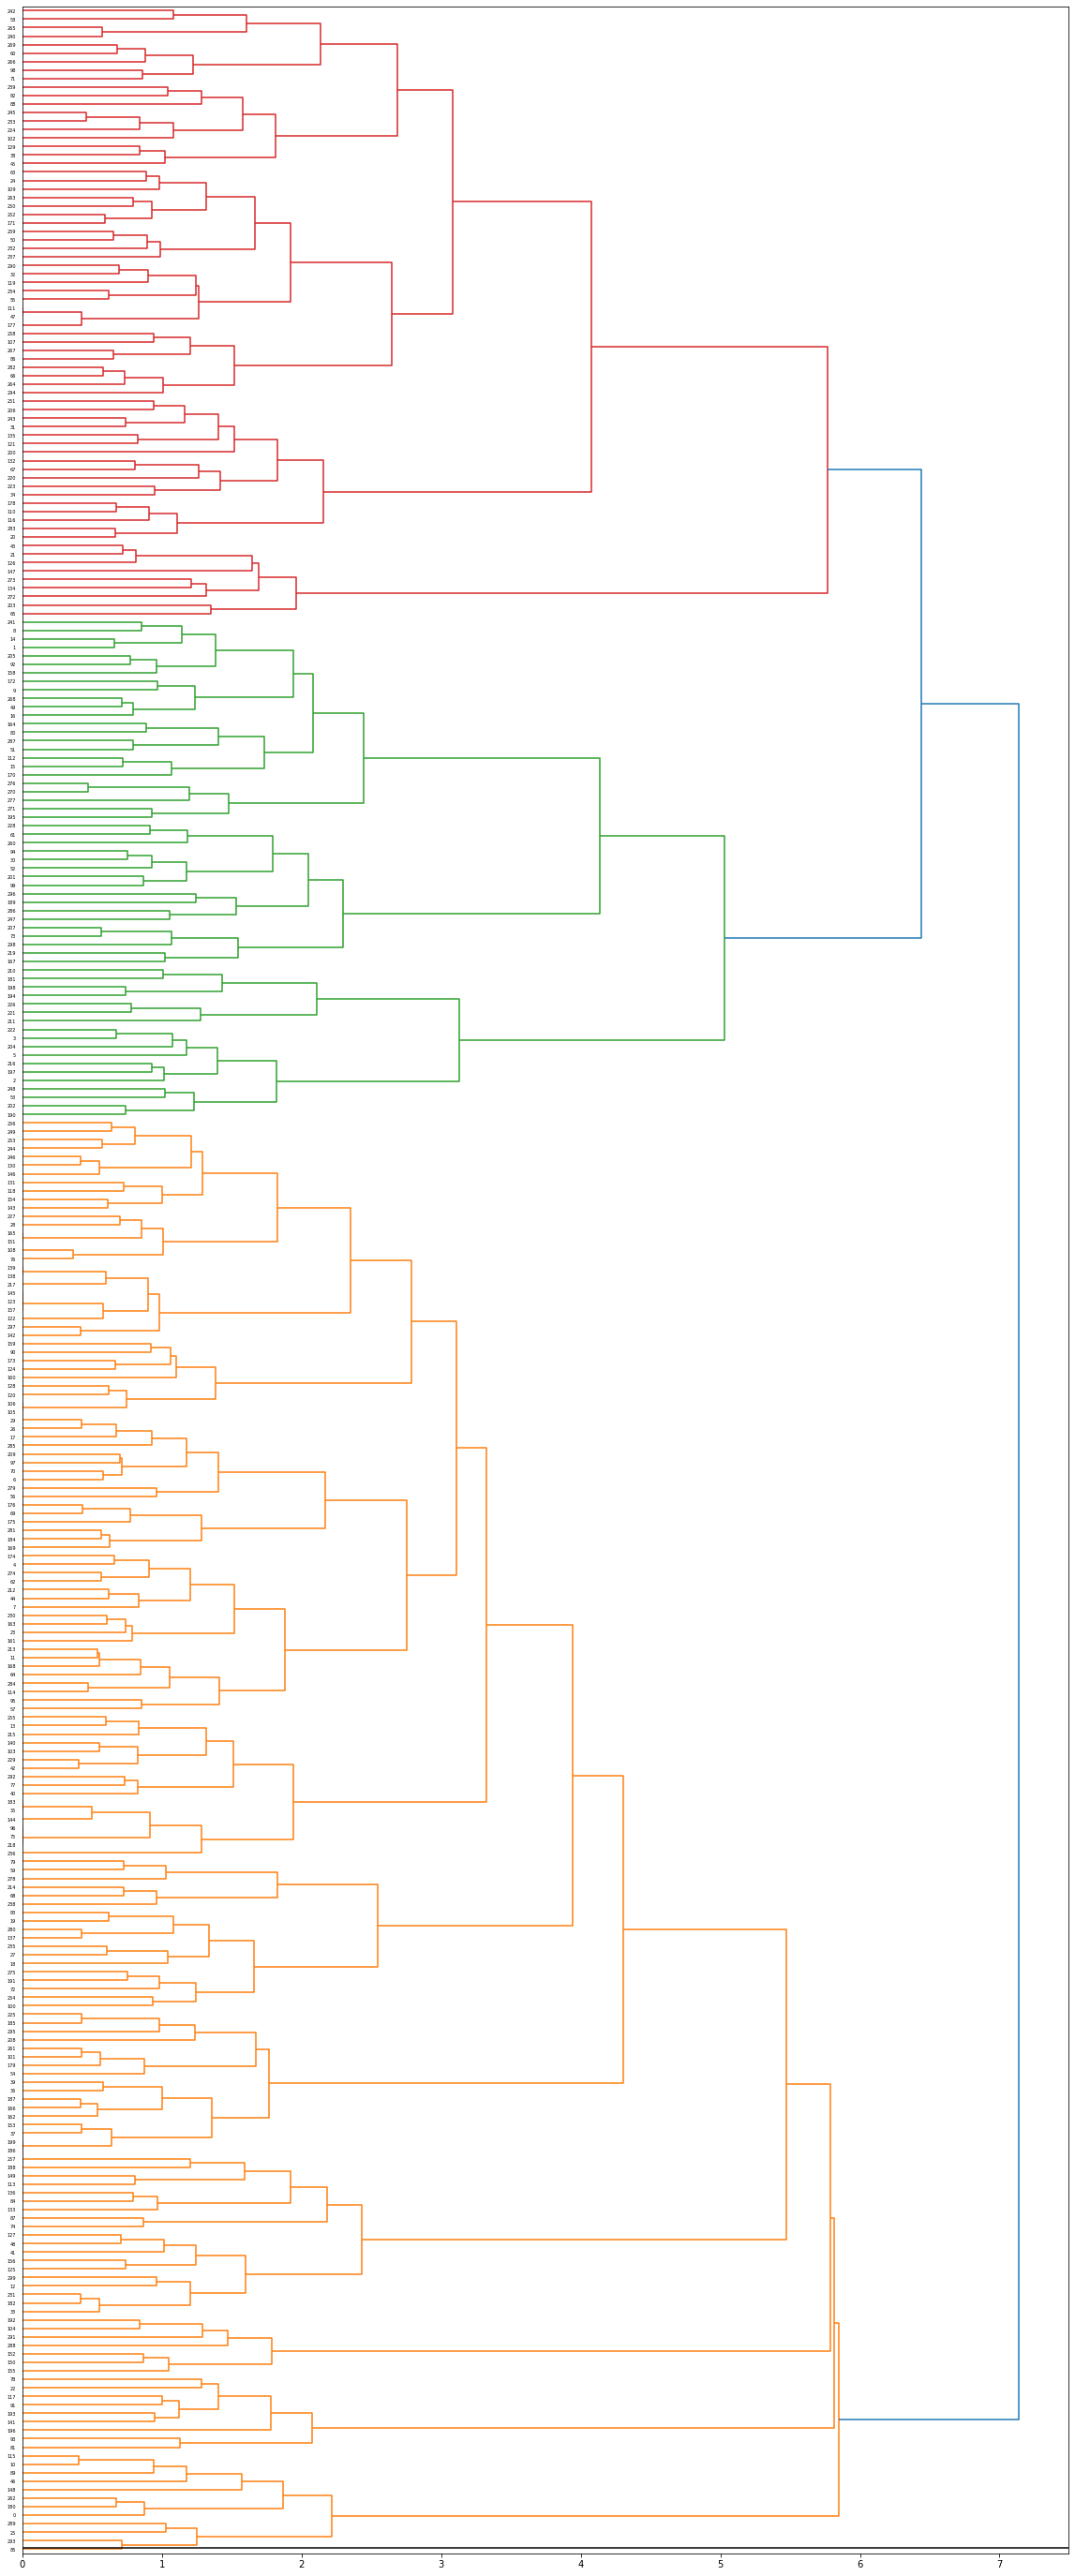

In [26]:
from scientisttools import plot_dendrogram
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(20,50))
plot_dendrogram(res_hcpc,ax=axe,orientation="right",max_d=6)
plt.show()

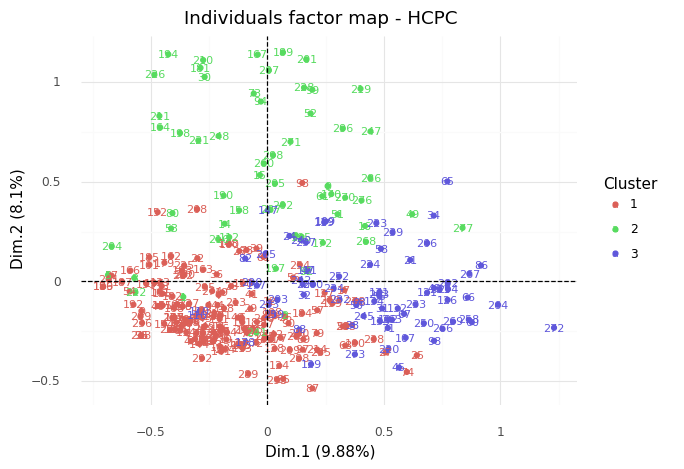

In [27]:
from scientisttools import fviz_hcpc_cluster
p = fviz_hcpc_cluster(res_hcpc,repel=False)
print(p)